# Linear regression model

Here we use the data that we have already processed previouwsly and
apply a simple linear regression model with ordinary least squares
using the `LinearRegression` module in the
[scikit-learn](https://scikit-learn.org/stable/index.html)
library.

Here I will explore some of the simpler concepts that come with
machine learning and using linear regression. There will be other
notebooks where I will use Ridge and LASSO regression.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
def replace_price_ticks(ax, xaxis, label):
    ticks = np.arange(0, 9e5, 1e5)
    labels = [str(int(round(t/1e3,0))) for t in ticks]
    if xaxis:
        ax.set_xticks(ticks, labels)
        ax.set_xlabel(f'{label} / 10$^3\\times$USD')
    else:
        ax.set_yticks(ticks, labels)
        ax.set_ylabel(f'{label} / 10$^3\\times$USD')

def convert_strings(num, base):
    length = int(np.floor(np.log10(num)))
    if length < base:
        s = '0'+str(round(num, -(base-2)))[:2]
    elif length == base:
        s = str(round(num, -(base-2)))[:3]
    else:
        raise ValueError('The length of the number to round is larger')
    return '{}.{}E+{:02d}'.format(s[0], s[1:], base)

error_text = '''\
- Average sale price: {}
- Mean absolute error: {}
- Median absolute error: {}
- Root mean squared error: {}
- R Squared: {:.4f}\
'''

In [3]:
dtypes = dict(MSSubClass=str)
df = pd.read_csv(os.path.join('data', 'ames-data-no-missing.csv'), index_col=0)

In [4]:
np.where(df.isnull().any())

(array([], dtype=int64),)

In [5]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
test_predictions = model.predict(X_test)
MAE = metrics.mean_absolute_error(y_test, test_predictions)
MSE = metrics.mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
r2 = metrics.r2_score(y_test, test_predictions)
MedAE = metrics.median_absolute_error(y_test, test_predictions)
print(error_text.format(y_test.mean(), MAE, RMSE, MedAE, r2))

- Average actual price: 181122.35616438356
- Mean absolute error: 17678.08267374121
- Median absolute error: 26007.723123096093
- Root mean squared error: 12487.06973594951
- R2 score: 0.8977


In [10]:
base = int(np.floor(np.log10(y_test.mean())))
str_vals = [convert_strings(y_test.mean(), base),
            convert_strings(MAE, base),
            convert_strings(MedAE, base),
            convert_strings(RMSE, base),
            r2]

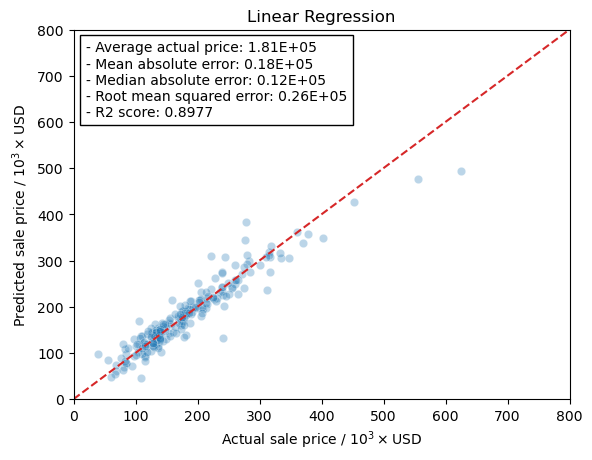

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(x=y_test, y=test_predictions, alpha=0.3, ax=ax)
replace_price_ticks(ax, True, 'Actual sale price')
replace_price_ticks(ax, False, 'Predicted sale price')
ylim = ax.get_ylim()
xlim = ax.get_xlim()
new_lim = list(ylim)
if new_lim[0] > xlim[0]:
    new_lim[0] = xlim[0]
if new_lim[1] < xlim[1]:
    new_lim[1] = xlim[1]
ax.set_ylim(new_lim)
ax.set_xlim(new_lim)
ax.plot(new_lim, new_lim, color='tab:red', linestyle='--')
ax.text(s=error_text.format(*str_vals),
        x=0.025, y=0.97, transform=ax.transAxes, ha='left', va='top',
        bbox=dict(fc="none"))
ax.set_title('Linear Regression')
fig.savefig(os.path.join('figures', 'linear-reg.png'), dpi=500)